<a href="https://colab.research.google.com/github/robitussin/CCADMACL_EXERCISES/blob/main/exercise1b/exercise1B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXERCISE 1B

You are working as a junior data scientist for a retail company that operates a large shopping mall. The marketing team wants to better understand customer segments so they can create more targeted promotions, loyalty programs, and personalized marketing strategies.

Your task is to analyze customer behavior using the Mall Customers Dataset, which includes information such as age, gender, annual income, and spending score. By applying K-Means clustering, you will identify natural customer groups based on their purchasing patterns.

<img src="https://cdn.theatlantic.com/media/mt/food/main%20Dmitrijs%20Dmitrijevs%20shutterstock_21143044.jpg"/>


In [3]:
import pandas as pd

from sklearn.cluster import KMeans
from sklearn import datasets,metrics
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import seaborn as sns

In [4]:
dataseturl = 'https://github.com/robitussin/CCADMACL_EXERCISES/blob/d10902a17b0a0ccfb79fe155ddeb19474d38da71/exercise1b/mallcustomers.csv?raw=true'


## 1. Load the Dataset


Load the Mall Customers dataset (upload or load from a URL).


In [5]:
df = pd.read_csv(dataseturl)

Display the first 5 rows using `head()`. `(5 pts)`

In [6]:
df.head()

,CustomerID,Genre,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 2. Explore the Dataset

Print dataset shape. `(5 pts)`


In [7]:
df.shape

(200, 5)

Show summary statistics using `describe()`. `(5 pts)`

In [8]:
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Check for missing values. `(5 pts)`

In [9]:
print(df.isnull().sum())

CustomerID       0
Genre            0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64


## 3. Select Features for Clustering

Use only the following columns:

- Annual Income (k$)
- Spending Score (1-100)


Create a new DataFrame with only these two columns. `(5 pts)`

In [10]:
dx = df.drop(labels=["CustomerID", "Genre"], axis=1)
dt = df.drop(labels=["CustomerID", "Age", "Genre"], axis=1)


Display the first 10 rows. `(5 pts)`

In [11]:
dt.head(10)

,AnnualIncome,SpendingScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
5,17,76
6,18,6
7,18,94
8,19,3
9,19,72


## 4. Visualize Data `(10 pts)`

- Create a scatter plot of Annual Income vs Spending Score.
- Label axes properly.
- Add a title.

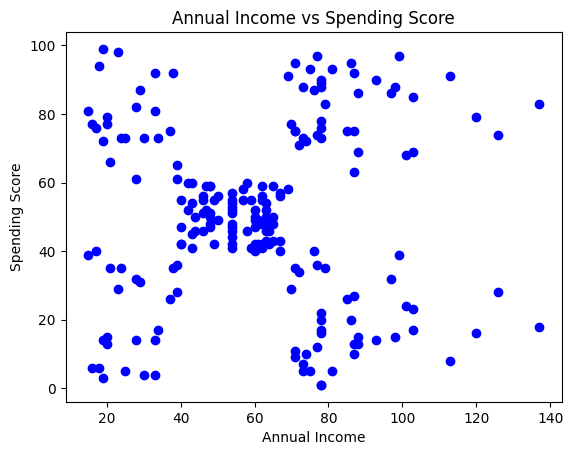

In [12]:
plt.scatter(x=dt["AnnualIncome"], y=dt["SpendingScore"], c="blue", marker="o")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Annual Income vs Spending Score")
plt.show()

<Axes: >

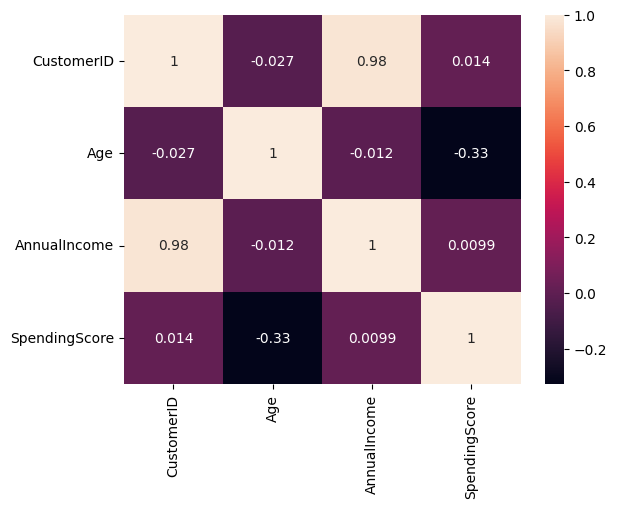

In [13]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

## 5. Determine Optimal Number of Clusters `(10 pts)`

- Run K-Means for K = 1 to 10.
- Store WCSS (within-cluster sum of squares).
- Plot the elbow curve.

For cluster = 1, SSE/WCSS is 269981.28
For cluster = 2, SSE/WCSS is 181363.59595959593
For cluster = 3, SSE/WCSS is 106348.37306211118
For cluster = 4, SSE/WCSS is 73679.78903948834
For cluster = 5, SSE/WCSS is 44448.45544793371
For cluster = 6, SSE/WCSS is 37265.86520484347
For cluster = 7, SSE/WCSS is 30259.65720728547
For cluster = 8, SSE/WCSS is 25050.832307547527
For cluster = 9, SSE/WCSS is 21862.09267218289
For cluster = 10, SSE/WCSS is 19657.783608703954


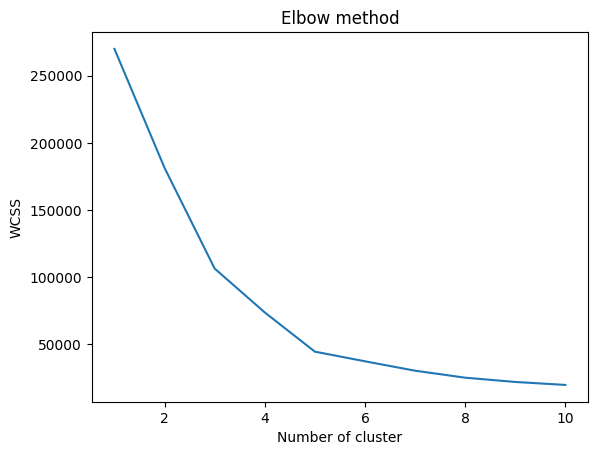

In [14]:
wcss = []
sse = {}
for i in range(1, 11):
    kmeans =  KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(dt)

    wcss.append(kmeans.inertia_)
    sse[i] = kmeans.inertia_
    print(f"For cluster = {i}, SSE/WCSS is {sse[i]}")

plt.plot(range(1, 11), wcss)
plt.title("Elbow method")
plt.xlabel("Number of cluster")
plt.ylabel("WCSS")
plt.show()

## 6. Train K-Means with Optimal K `(10 pts)`


- Choose K based on the elbow method.
- Fit the K-Means model.
- Assign cluster labels to the dataset.
- Display first 10 labeled rows.

In [15]:
cluster_Kmeans = KMeans(n_clusters=5)
model_kmeans= cluster_Kmeans.fit(dt)
pred_kmeans= model_kmeans.labels_
print(pred_kmeans)

unique, counts = np.unique(pred_kmeans, return_counts=True)
freq = dict(zip(unique, counts))
print(freq)

[3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 0 3 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 4 1 0 1 4 1 4 1 0 1 4 1 4 1 4 1 4 1 0 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1]
{np.int32(0): np.int64(81), np.int32(1): np.int64(39), np.int32(2): np.int64(22), np.int32(3): np.int64(23), np.int32(4): np.int64(35)}


## 7. Visualize the Clusters `(10 pts)`

- Create a scatter plot showing the formed clusters.
- Color points by cluster.
- Plot cluster centroids as larger points.

Clusters Frequency {np.int32(0): np.int64(81), np.int32(1): np.int64(39), np.int32(2): np.int64(22), np.int32(3): np.int64(23), np.int32(4): np.int64(35)}
Silhouette Score for 5 Clusters 0.553931997444648




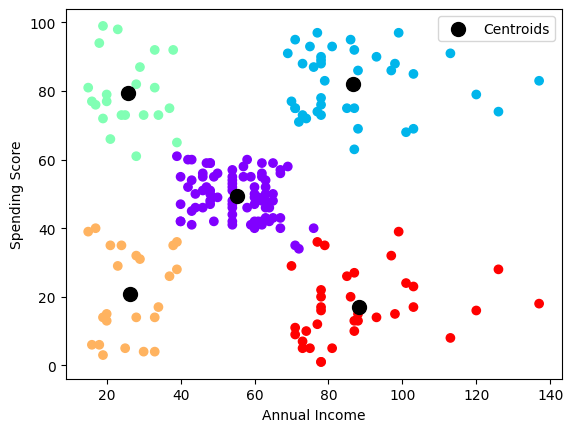

In [16]:
print(f"Clusters Frequency {freq}")
print('Silhouette Score for 5 Clusters',silhouette_score(dt,pred_kmeans))
print("\n")

centroids = model_kmeans.cluster_centers_
plt.scatter(x=dt["AnnualIncome"], y=dt["SpendingScore"], c=pred_kmeans, cmap="rainbow" )
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c="black", marker='o', label= "Centroids")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

## 8. Cluster Interpretation



Answer the following (in text, not code): `(10 pts)`

- Which cluster represents high income, low spending users? -> **Blue**
- Which cluster represents low income, high spending users? -> **Green**
- Which cluster might represent target customers for promotions? -> **Orange**
- What business insights can you derive from the clusters? -> **Based on the given data, we can promote the products to people that has high income and has high spending score because they have the higher chance buying the endorsed product.**

## 9. Add Age to the Clustering Model

Create a new 3D K-Means model using features: `(5 pts)`


- Age
- Annual Income
- Spending Score


In [17]:
new_cluster_Kmeans = KMeans(n_clusters=5)
new_model_kmeans= new_cluster_Kmeans.fit(dx)
new_pred_kmeans= new_model_kmeans.labels_
print(new_pred_kmeans)

unique, counts = np.unique(pred_kmeans, return_counts=True)
freq = dict(zip(unique, counts))
print(freq)

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 4 1 2 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 2 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1]
{np.int32(0): np.int64(81), np.int32(1): np.int64(39), np.int32(2): np.int64(22), np.int32(3): np.int64(23), np.int32(4): np.int64(35)}


Visualize using a 3D scatter plot. `(5 pts)`

In [18]:
import plotly.express as px
fig = px.scatter_3d(dx, x="Age", y="AnnualIncome", z='SpendingScore', size="Age", color=new_pred_kmeans)
fig.show()

## 10. 3D Cluster Interpretation



Answer the following (in text, not code): `(10 pts)`

- Are there meaningful and distinguishable clusters? -> ***Based on the graph, most of the Blue are Elderly or Middle Aged. and Red and Orange consists of young People, most are students and Yellow and Purple consist of Adults who have more income but tight with their spendings***

- What business insights can you derive from the clusters in 3D?? -> ***We can promote our products on people who are ranged with teenagers to young adults since they have the high chance of spending, And we can bring provide loyalty program to Young Adults that has higher incomes.***

In [19]:
# put your answer here